In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df = pd.read_csv('df_clean.csv')

df.head()

,lipase_level,gender,actual_age,is_confirmed_ap,charlson_comorbidity_index,aniongap_chemistry,bicarbonate_chemistry,bun_chemistry,calcium_chemistry,chloride_chemistry,...,sodium_chemistry,potassium_chemistry,bilirubin_total_enzyme,amylase_enzyme,alt_enzyme,alp_enzyme,ast_enzyme,creatinine_albumin_ratio,wbc,severity
0,1222.0,0,64,1,4,20.0,28.0,11.0,9.6,110.0,...,143.0,4.5,1.7,302.0,523.0,252.0,333.0,0.250000,14.1,4
1,508.0,0,67,1,3,17.0,27.0,9.0,9.6,98.0,...,139.0,4.6,0.6,177.0,14.0,138.0,14.0,0.151515,12.9,3
2,1164.0,1,64,1,4,22.0,37.0,51.0,8.4,115.0,...,148.0,5.7,1.1,43.0,85.0,94.0,55.0,0.435897,33.0,0
3,677.0,1,58,1,2,27.0,29.0,82.0,9.6,112.0,...,150.0,5.8,5.6,231.0,257.0,719.0,303.0,2.000000,48.3,0
4,692.0,1,32,1,0,15.0,34.0,11.0,7.8,108.0,...,142.0,4.3,0.8,285.0,91.0,69.0,149.0,0.366667,14.4,3


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   lipase_level                1024 non-null   float64
 1   gender                      1024 non-null   int64  
 2   actual_age                  1024 non-null   int64  
 3   is_confirmed_ap             1024 non-null   int64  
 4   charlson_comorbidity_index  1024 non-null   int64  
 5   aniongap_chemistry          1024 non-null   float64
 6   bicarbonate_chemistry       1024 non-null   float64
 7   bun_chemistry               1024 non-null   float64
 8   calcium_chemistry           1024 non-null   float64
 9   chloride_chemistry          1024 non-null   float64
 10  glucose_chemistry           1024 non-null   float64
 11  sodium_chemistry            1024 non-null   float64
 12  potassium_chemistry         1024 non-null   float64
 13  bilirubin_total_enzyme      1024 

In [22]:
import pandas as pd
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
# Select features for clustering
features = ['lipase_level', 'gender', 'actual_age',
       'charlson_comorbidity_index', 'aniongap_chemistry',
       'bicarbonate_chemistry', 'bun_chemistry', 'calcium_chemistry',
       'chloride_chemistry', 'glucose_chemistry', 'sodium_chemistry',
       'potassium_chemistry', 'bilirubin_total_enzyme', 'amylase_enzyme',
       'alt_enzyme', 'alp_enzyme', 'ast_enzyme', 'creatinine_albumin_ratio',
       'wbc','severity']

# Extract the feature data
X = df[features]

# Identify categorical features
categorical_features = ['gender', 'severity']
numerical_features = ['lipase_level',  'actual_age',
       'charlson_comorbidity_index', 'aniongap_chemistry',
       'bicarbonate_chemistry', 'bun_chemistry', 'calcium_chemistry',
       'chloride_chemistry', 'glucose_chemistry', 'sodium_chemistry',
       'potassium_chemistry', 'bilirubin_total_enzyme', 'amylase_enzyme',
       'alt_enzyme', 'alp_enzyme', 'ast_enzyme', 'creatinine_albumin_ratio',
       'wbc']
print(X.columns.get_loc('severity'))
categorical_indices = [X.columns.get_loc(col) for col in categorical_features]

# Standardize numerical features
scaler = StandardScaler()
X.iloc[:, ~X.columns.isin(categorical_features)] = scaler.fit_transform(X.iloc[:, ~X.columns.isin(categorical_features)])

# Initialize the K-Prototypes model
kproto = KPrototypes(n_clusters=3, init='Cao', verbose=2)

# Fit the model to the data
clusters = kproto.fit_predict(X, categorical=categorical_indices)

# Add the cluster assignments to the original DataFrame
df['cluster'] = clusters

# View the cluster centroids
cluster_centers = kproto.cluster_centroids_
print(cluster_centers)

# Create a DataFrame for the centroids
centroids = pd.DataFrame(cluster_centers, columns=features)
centroids


19
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 378, ncost: 14575.847353116795
Run: 1, iteration: 2/100, moves: 86, ncost: 14443.26451019569


C:\Users\Nan\AppData\Local\Temp\ipykernel_37812\1154232483.py:30: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.27604071  0.4481879   0.27604071 ...  1.36630626  0.4481879
 -0.52731285]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\Nan\AppData\Local\Temp\ipykernel_37812\1154232483.py:30: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.75765584  0.18253384  0.75765584 ...  1.33277784  0.18253384
 -0.96771016]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



Run: 1, iteration: 3/100, moves: 24, ncost: 14432.642608234753
Run: 1, iteration: 4/100, moves: 17, ncost: 14422.901175368968
Run: 1, iteration: 5/100, moves: 11, ncost: 14419.911621266281
Run: 1, iteration: 6/100, moves: 5, ncost: 14419.278704535305
Run: 1, iteration: 7/100, moves: 2, ncost: 14419.160122741556
Run: 1, iteration: 8/100, moves: 0, ncost: 14419.160122741556
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 254, ncost: 15409.02641776019
Run: 2, iteration: 2/100, moves: 119, ncost: 15052.163225936143
Run: 2, iteration: 3/100, moves: 118, ncost: 14638.212748883509
Run: 2, iteration: 4/100, moves: 36, ncost: 14620.254167454174
Run: 2, iteration: 5/100, moves: 7, ncost: 14618.71205076904
Run: 2, iteration: 6/100, moves: 5, ncost: 14618.161560379978
Run: 2, iteration: 7/100, moves: 2, ncost: 14618.050142739621
Run: 2, iteration: 8/100, moves: 0, ncost: 14618.050142739621
Init: initializing centroids
Init: initializ

,lipase_level,gender,actual_age,charlson_comorbidity_index,aniongap_chemistry,bicarbonate_chemistry,bun_chemistry,calcium_chemistry,chloride_chemistry,glucose_chemistry,sodium_chemistry,potassium_chemistry,bilirubin_total_enzyme,amylase_enzyme,alt_enzyme,alp_enzyme,ast_enzyme,creatinine_albumin_ratio,wbc,severity
0,0.074102,0.168038,0.323567,0.789016,0.438766,1.079162,0.429202,0.604310,0.493074,0.765985,0.846605,0.382616,-0.075433,-0.061925,0.287670,-0.001144,0.867448,0.769351,1.0,0.0
1,-0.031885,-0.050084,-0.133402,-0.449605,-0.178078,-0.524697,-0.245967,-0.289543,-0.235499,-0.365747,-0.428678,-0.214462,0.047504,-0.183963,-0.139276,-0.216488,-0.434791,-0.369668,1.0,3.0
2,-0.052190,-0.605057,-0.355484,1.855842,-0.543790,0.561694,1.040079,0.220854,0.163835,0.252344,0.814142,0.821873,-0.276423,4.656611,0.136768,4.753376,0.736918,0.304139,1.0,1.0


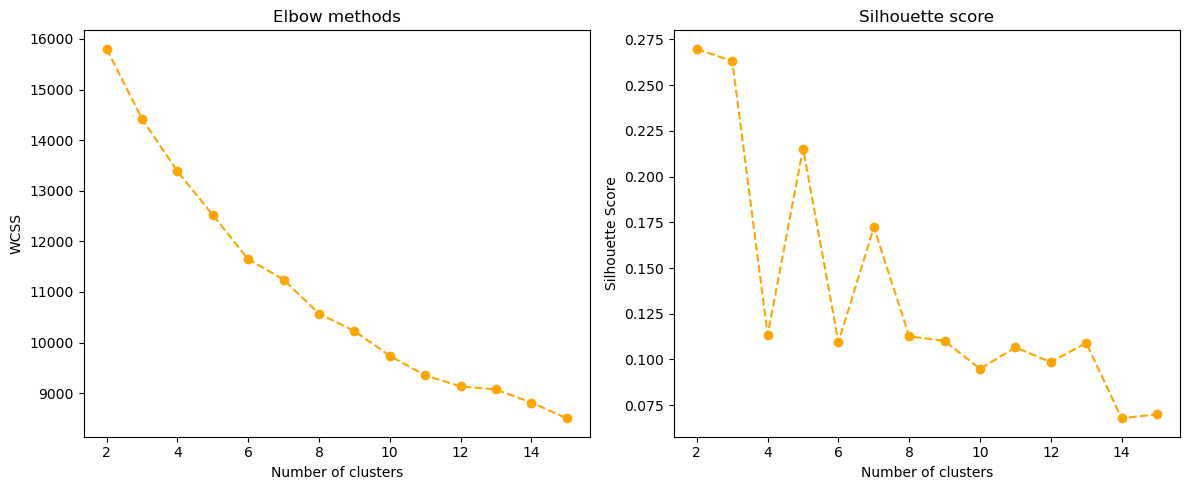

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from kmodes.kprototypes import KPrototypes

# Assuming X is the dataset with features already prepared
wcss = []
silhouette_scores = []
max_clusters = 15

# Iterate over a range of cluster numbers
for n_clusters in range(2, max_clusters + 1):
    kproto = KPrototypes(n_clusters=n_clusters, init='Cao', verbose=0)
    clusters = kproto.fit_predict(X, categorical=categorical_indices)
    
    # Calculate WCSS (Within-Cluster Sum of Squares)
    wcss.append(kproto.cost_)
    
    # Calculate silhouette score for the clustering (only for n_clusters > 1)
    silhouette_avg = silhouette_score(X, clusters, metric='euclidean')
    silhouette_scores.append(silhouette_avg)

# Plotting the Elbow Method for WCSS
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), wcss, 'o--', color='orange')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow methods')

# Plotting the Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, 'o--', color='orange')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette score')

plt.tight_layout()
plt.show()


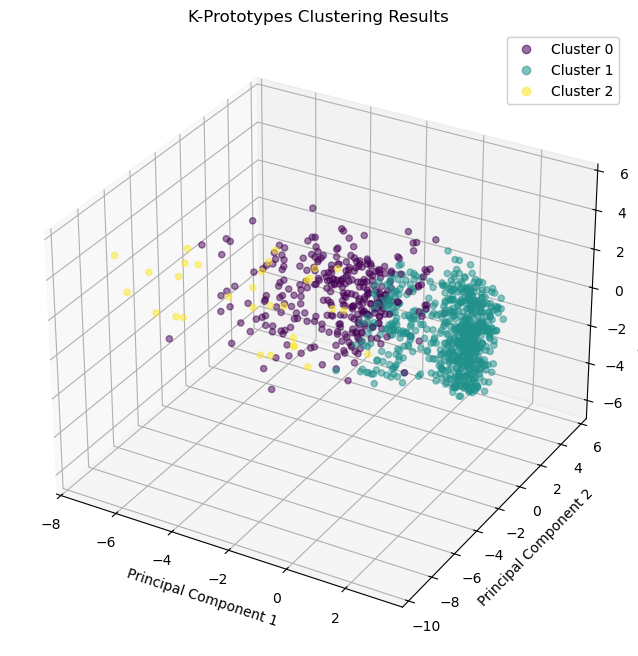

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df['cluster'], cmap='viridis', alpha=0.5)

ax.set_title('K-Prototypes Clustering Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')


legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(3)], loc='upper right')
ax.add_artist(legend1)

plt.show()



In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import plotly.express as px


# Select numerical features for clustering
features = ['lipase_level', 'crp_level', 'amylase_level', 'age']

# Extract the feature data
# X = df[features]

# # Standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Initialize the DBSCAN model
dbscan = DBSCAN(eps=3, min_samples=300)

# Fit the model to the data
clusters = dbscan.fit_predict(X)

# Add the cluster assignments to the original DataFrame
df['cluster'] = clusters

# Perform PCA to reduce dimensions to 3
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['cluster'] = clusters
pca_df

,PC1,PC2,PC3,cluster
0,1.770044,0.158317,0.698540,0
1,2.269591,0.051289,0.662390,0
2,-2.506842,1.716202,-1.612274,-1
3,-3.913543,0.169191,-0.113902,-1
4,2.127600,-0.905138,-1.939029,0
...,...,...,...,...
1019,-0.550171,1.438700,0.909315,-1
1020,-2.348859,0.280760,1.912977,-1
1021,-5.634489,2.069348,-0.162042,-1
1022,-0.727428,0.420305,0.896602,-1


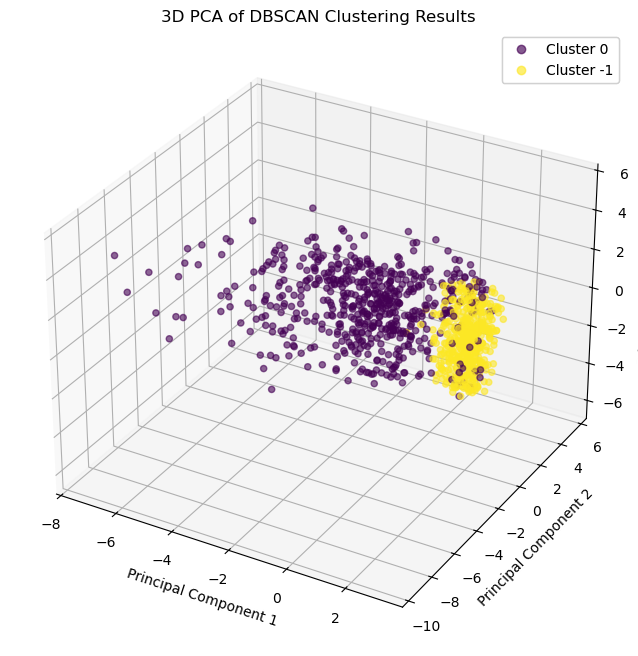

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot of the PCA results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
scatter = ax.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    pca_df['PC3'],
    c=pca_df['cluster'],
    cmap='viridis',
    alpha=0.6
)


ax.set_title('3D PCA of DBSCAN Clustering Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')


legend_labels = [f'Cluster {int(i)}' for i in pca_df['cluster'].unique()]
legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, loc='upper right')
ax.add_artist(legend1)


plt.show()

